In [ ]:
#import Python Libraries#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#path to dataset
df_covid = pd.read_csv('/content/drive/MyDrive/covid19-download.csv')

In [ ]:
df_covid

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,NaN,NaN,3,300.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,NaN,NaN,1,100.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,4,0,0.0,4,NaN,NaN,NaN,NaN,4,400.00,0.01,0.00,0.0,0.00,NaN,NaN,100.00,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,3,0,0.0,3,NaN,NaN,NaN,NaN,0,0.00,0.02,0.00,0.0,0.00,NaN,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,4,0,0.0,4,NaN,NaN,NaN,NaN,3,300.00,0.08,0.00,0.0,0.00,NaN,NaN,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,60,Yukon,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.00,8.0,19.58,0.0,0.00,1.0,2.80,0.0,0.00
3908,61,Northwest Territories,Territoires du Nord-Ouest,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3909,62,Nunavut,Nunavut,2020-11-22,130,0,0.0,130,3723.0,2.0,1.54,96003.0,21,19.27,335.22,0.00,0.0,0.00,0.0,0.0,98.46,128.0,330.07,128.0,330.07,0.0,0.00,112.0,288.81,0.0,0.00,16.0,41.26,0.0,0.00
3910,99,Repatriated travellers,Voyageurs rapatriés,2020-11-22,13,0,0.0,13,76.0,13.0,100.00,NaN,0,0.00,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [ ]:
df_covid.head(5)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,NaN,NaN,3,300.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,NaN,NaN,1,100.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,4,0,0.0,4,NaN,NaN,NaN,NaN,4,400.0,0.01,0.0,0.0,0.0,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,3,0,0.0,3,NaN,NaN,NaN,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,4,0,0.0,4,NaN,NaN,NaN,NaN,3,300.0,0.08,0.0,0.0,0.0,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_covid.tail(5)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
3907,60,Yukon,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.00,8.0,19.58,0.0,0.00,1.0,2.80,0.0,0.00
3908,61,Northwest Territories,Territoires du Nord-Ouest,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3909,62,Nunavut,Nunavut,2020-11-22,130,0,0.0,130,3723.0,2.0,1.54,96003.0,21,19.27,335.22,0.00,0.0,0.00,0.0,0.0,98.46,128.0,330.07,128.0,330.07,0.0,0.00,112.0,288.81,0.0,0.00,16.0,41.26,0.0,0.00
3910,99,Repatriated travellers,Voyageurs rapatriés,2020-11-22,13,0,0.0,13,76.0,13.0,100.00,NaN,0,0.00,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3911,1,Canada,Canada,2020-11-22,330503,0,11455.0,330503,10881653.0,264049.0,79.89,289488.0,4792,1.47,879.25,30.47,49.0,3.47,58764.0,3651.0,16.64,54999.0,146.32,65854.0,175.19,933.0,2.48,33113.0,88.09,502.0,1.34,4730.0,12.58,72.0,0.19


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                3912 non-null   int64  
 1   prname               3912 non-null   object 
 2   prnameFR             3912 non-null   object 
 3   date                 3912 non-null   object 
 4   numconf              3912 non-null   int64  
 5   numprob              3912 non-null   int64  
 6   numdeaths            3793 non-null   float64
 7   numtotal             3912 non-null   int64  
 8   numtested            3855 non-null   float64
 9   numrecover           3388 non-null   float64
 10  percentrecover       3184 non-null   float64
 11  ratetested           3586 non-null   float64
 12  numtoday             3912 non-null   int64  
 13  percentoday          3912 non-null   float64
 14  ratetotal            3655 non-null   float64
 15  ratedeaths           3655 non-null   f

In [ ]:
df_covid.describe()

,pruid,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
count,3912.000000,3912.000000,3912.000000,3793.000000,3912.000000,3.855000e+03,3388.000000,3184.000000,3586.000000,3912.000000,3912.000000,3655.000000,3655.000000,3793.000000,3515.000000,3855.000000,3388.000000,3515.000000,3515.000000,3655.000000,3660.000000,3416.000000,3660.000000,3416.000000,3660.000000,3416.000000,3660.000000,3416.000000,3660.000000,3416.000000,3660.000000,3416.000000
mean,39.084867,15304.004346,1.677914,960.653309,15304.687117,5.471376e+05,13523.805785,82.674413,80797.899888,168.964213,3.700291,147.867880,7.247393,6.039810,2.523804,5645.474968,158.765348,24.863192,2961.314936,28.006372,2285.528415,24.405629,84.130874,0.703115,1204.695628,13.214652,42.980874,0.363299,172.089071,1.887679,6.122131,0.051838
std,26.249203,38027.831991,21.060288,2316.385138,38028.214511,1.462322e+06,32915.369939,21.644092,75518.164289,485.873484,19.287817,229.657102,15.589420,21.150013,2.828577,13394.295491,727.999185,33.711317,7471.227290,63.724167,6181.386998,47.159461,280.182591,1.998986,3288.582014,26.673994,142.754560,1.032700,469.806901,3.810591,20.405271,0.147585
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,26.000000,-1.000000,-0.410000,0.000000,0.000000,-2.000000,0.000000,-20682.000000,-31.000000,0.000000,0.000000,0.000000,-1.000000,-0.190000,0.000000,0.000000,-1.000000,-0.190000,0.000000,0.000000,0.000000,-0.030000,0.000000,0.000000
25%,12.000000,13.000000,0.000000,0.000000,13.000000,3.017000e+03,15.000000,79.207500,26984.500000,0.000000,0.000000,17.200000,0.000000,0.000000,0.000000,14.000000,0.000000,1.525000,2.000000,0.210000,0.750000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,282.000000,0.000000,6.000000,289.000000,4.393200e+04,318.000000,88.890000,58103.000000,1.000000,0.160000,50.040000,0.580000,0.000000,1.330000,367.000000,0.000000,8.970000,57.000000,4.900000,21.000000,6.180000,0.000000,0.070000,11.000000,2.700000,0.000000,0.000000,2.000000,0.390000,0.000000,0.000000
75%,60.000000,6685.000000,0.000000,187.000000,6685.000000,2.359895e+05,7036.000000,97.600000,108693.750000,80.000000,1.370000,172.485000,5.970000,1.000000,4.960000,3207.500000,76.000000,31.980000,1431.500000,24.555000,1407.250000,24.897500,21.000000,0.410000,725.500000,12.980000,11.000000,0.210000,104.000000,1.850000,2.000000,0.030000
max,99.000000,330503.000000,833.000000,11455.000000,330503.000000,1.088165e+07,264049.000000,100.000000,393138.000000,5267.000000,600.000000,1556.190000,80.480000,222.000000,9.990000,152094.000000,23853.000000,100.000000,54999.000000,593.080000,65854.000000,410.010000,2311.000000,17.580000,33513.000000,288.810000,1236.000000,9.100000,4788.000000,41.260000,177.000000,1.300000


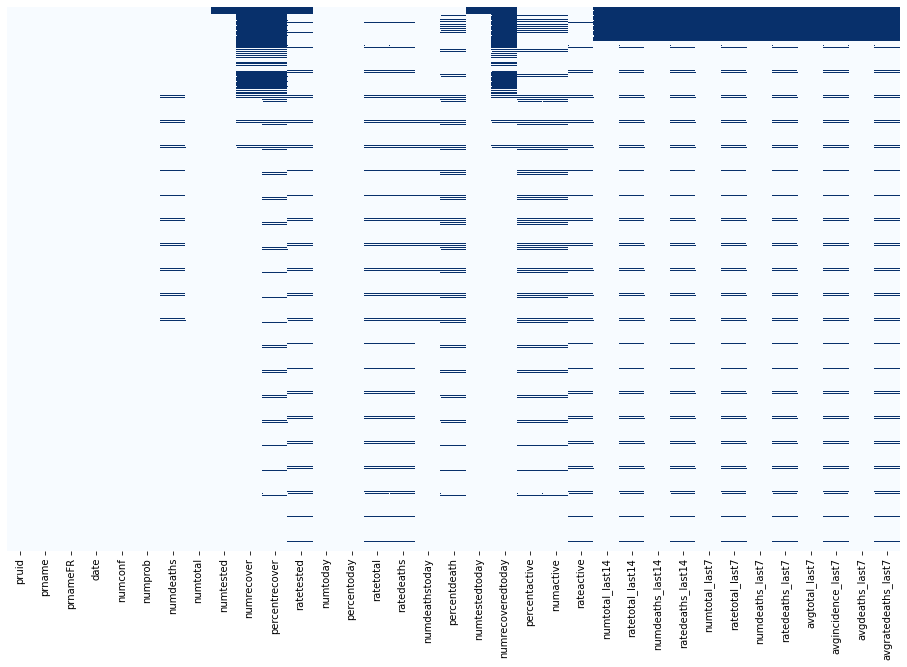

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df_covid.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
#replace null values with mean for the number of deaths
df_covid['numdeaths'].fillna(df_covid['numdeaths'].mean(),inplace = True)

In [ ]:
#replace the null values in the following columns with zero
df_replace = ['percentrecover','ratetested','ratetotal','ratedeaths','numdeathstoday','percentdeath','rateactive','numactive','percentactive','numrecover','numrecoveredtoday','numtestedtoday','numtested']

In [ ]:
#continuation of the previous line of code
for str in df_replace:
  df_covid[str].fillna(0, inplace = True)

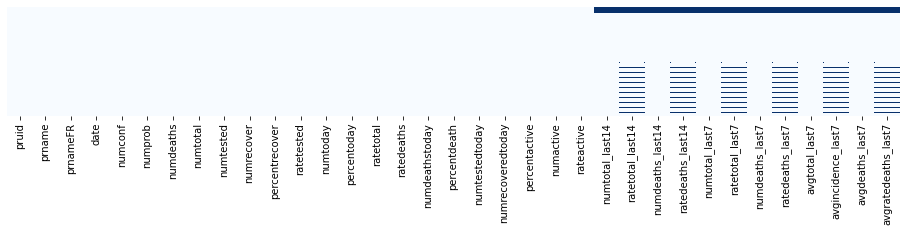

In [ ]:
plt.figure(figsize = (16,2))
sns.heatmap(df_covid.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e8c709940>,
      dtype=object)

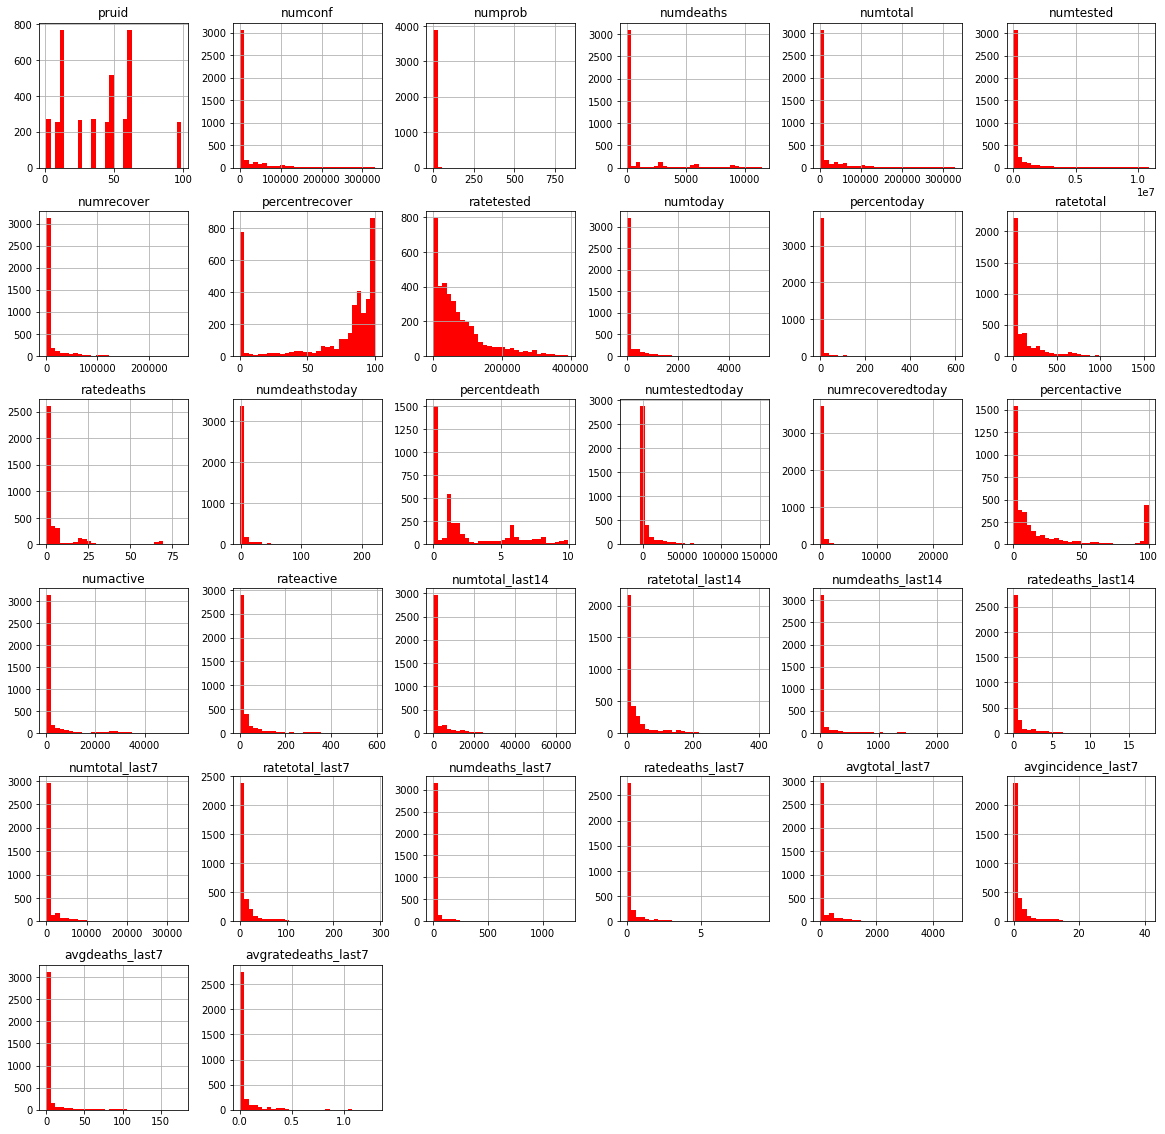

In [ ]:
df_covid.hist(bins = 30, figsize =(20,20), color = 'r' )

# Exploration and Cleaning of the dataset

In [ ]:
#Eliminate unwanted columns from the dataset
df_covid1 = df_covid.drop(['prnameFR'],axis = 1)
df_covid1

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,2020-01-31,3,0,0.0,3,0.0,0.0,0.00,0.0,3,300.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,2020-01-31,1,0,0.0,1,0.0,0.0,0.00,0.0,1,100.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,2020-01-31,4,0,0.0,4,0.0,0.0,0.00,0.0,4,400.00,0.01,0.00,0.0,0.00,0.0,0.0,100.00,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,2020-02-08,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,2020-02-08,4,0,0.0,4,0.0,0.0,0.00,0.0,3,300.00,0.08,0.00,0.0,0.00,0.0,0.0,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,60,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.00,8.0,19.58,0.0,0.00,1.0,2.80,0.0,0.00
3908,61,Northwest Territories,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3909,62,Nunavut,2020-11-22,130,0,0.0,130,3723.0,2.0,1.54,96003.0,21,19.27,335.22,0.00,0.0,0.00,0.0,0.0,98.46,128.0,330.07,128.0,330.07,0.0,0.00,112.0,288.81,0.0,0.00,16.0,41.26,0.0,0.00
3910,99,Repatriated travellers,2020-11-22,13,0,0.0,13,76.0,13.0,100.00,0.0,0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


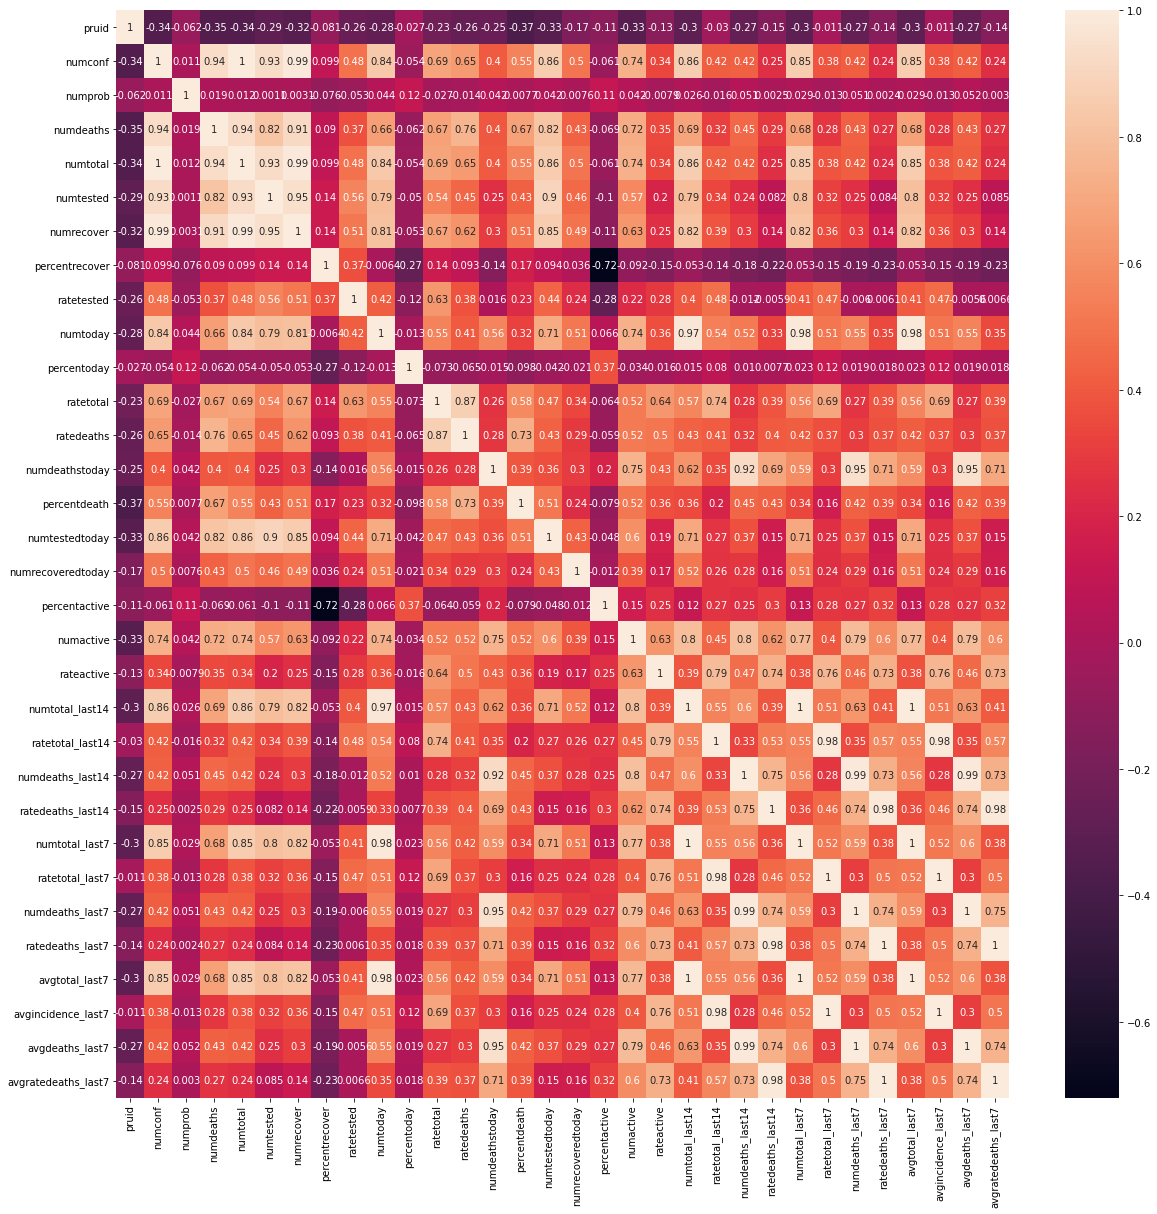

In [ ]:
#Provide a plot to show correlation matrix between attributes in the dataset 
cor_cov = df_covid1.corr()
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(cor_cov, annot = True)

In [ ]:
# showing the correlation of variables to numdeaths
cor_strong = df_covid1.corr()['numdeaths'].sort_values()
cor_strong = cor_strong[cor_strong >=.45]
cor_strong

numtoday           0.661875
percentdeath       0.672725
ratetotal          0.673807
numtotal_last7     0.676951
avgtotal_last7     0.676956
numtotal_last14    0.689159
numactive          0.719560
ratedeaths         0.755622
numtested          0.820884
numtestedtoday     0.821143
numrecover         0.913954
numconf            0.939488
numtotal           0.939498
numdeaths          1.000000
Name: numdeaths, dtype: float64

In [ ]:
#Eliminate unwanted rows from the dataset
df_covid1 = df_covid1[~df_covid1['prname'].str.contains('Canada')]

In [ ]:
df_covid1 = df_covid1[~df_covid1['prname'].str.contains('Repatriated travellers')]

In [ ]:
df_covid1.head(20) # after Repartriated travellers and canada rows had been eliminated 

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,2020-01-31,3,0,0.0,3,0.0,0.0,0.0,0.0,3,300.00,0.02,0.0,0.0,0.0,0.0,0.0,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,2020-01-31,1,0,0.0,1,0.0,0.0,0.0,0.0,1,100.00,0.02,0.0,0.0,0.0,0.0,0.0,100.0,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,2020-02-08,3,0,0.0,3,0.0,0.0,0.0,0.0,0,0.00,0.02,0.0,0.0,0.0,0.0,0.0,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,2020-02-08,4,0,0.0,4,0.0,0.0,0.0,0.0,3,300.00,0.08,0.0,0.0,0.0,0.0,0.0,100.0,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,2020-02-16,3,0,0.0,3,0.0,0.0,0.0,0.0,0,0.00,0.02,0.0,0.0,0.0,0.0,0.0,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59,British Columbia,2020-02-16,5,0,0.0,5,0.0,0.0,0.0,0.0,1,25.00,0.10,0.0,0.0,0.0,0.0,0.0,100.0,5.0,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35,Ontario,2020-02-21,3,0,0.0,3,0.0,0.0,0.0,0.0,0,0.00,0.02,0.0,0.0,0.0,0.0,0.0,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,59,British Columbia,2020-02-21,6,0,0.0,6,0.0,0.0,0.0,0.0,1,20.00,0.12,0.0,0.0,0.0,0.0,0.0,100.0,6.0,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,35,Ontario,2020-02-24,4,0,0.0,4,0.0,0.0,0.0,0.0,1,33.33,0.03,0.0,0.0,0.0,0.0,0.0,100.0,4.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,59,British Columbia,2020-02-24,6,0,0.0,6,0.0,0.0,0.0,0.0,0,0.00,0.12,0.0,0.0,0.0,0.0,0.0,100.0,6.0,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_covid2 = df_covid1
df_covid2

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,2020-01-31,3,0,0.0,3,0.0,0.0,0.00,0.0,3,300.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,2020-01-31,1,0,0.0,1,0.0,0.0,0.00,0.0,1,100.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,2020-02-08,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,2020-02-08,4,0,0.0,4,0.0,0.0,0.00,0.0,3,300.00,0.08,0.00,0.0,0.00,0.0,0.0,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,2020-02-16,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,12,Nova Scotia,2020-11-22,1179,0,65.0,1179,129339.0,1070.0,90.75,133148.0,11,0.94,121.37,6.69,0.0,5.51,849.0,0.0,3.73,44.0,4.53,51.0,5.25,0.0,0.0,35.0,3.60,0.0,0.0,5.0,0.51,0.0,0.0
3906,11,Prince Edward Island,2020-11-22,68,0,0.0,68,54811.0,65.0,95.59,349233.0,0,0.00,43.33,0.00,0.0,0.00,160.0,0.0,4.41,3.0,1.91,2.0,1.27,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3907,60,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.0,8.0,19.58,0.0,0.0,1.0,2.80,0.0,0.0
3908,61,Northwest Territories,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
#create a new column for Phases of lockdown 
df_covid2['phases'] = 2

In [ ]:
df_covid2

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,phases
0,35,Ontario,2020-01-31,3,0,0.0,3,0.0,0.0,0.00,0.0,3,300.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,59,British Columbia,2020-01-31,1,0,0.0,1,0.0,0.0,0.00,0.0,1,100.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,35,Ontario,2020-02-08,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,59,British Columbia,2020-02-08,4,0,0.0,4,0.0,0.0,0.00,0.0,3,300.00,0.08,0.00,0.0,0.00,0.0,0.0,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,35,Ontario,2020-02-16,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,12,Nova Scotia,2020-11-22,1179,0,65.0,1179,129339.0,1070.0,90.75,133148.0,11,0.94,121.37,6.69,0.0,5.51,849.0,0.0,3.73,44.0,4.53,51.0,5.25,0.0,0.0,35.0,3.60,0.0,0.0,5.0,0.51,0.0,0.0,2
3906,11,Prince Edward Island,2020-11-22,68,0,0.0,68,54811.0,65.0,95.59,349233.0,0,0.00,43.33,0.00,0.0,0.00,160.0,0.0,4.41,3.0,1.91,2.0,1.27,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2
3907,60,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.0,8.0,19.58,0.0,0.0,1.0,2.80,0.0,0.0,2
3908,61,Northwest Territories,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2


In [ ]:
df_covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3909
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                3382 non-null   int64  
 1   prname               3382 non-null   object 
 2   date                 3382 non-null   object 
 3   numconf              3382 non-null   int64  
 4   numprob              3382 non-null   int64  
 5   numdeaths            3382 non-null   float64
 6   numtotal             3382 non-null   int64  
 7   numtested            3382 non-null   float64
 8   numrecover           3382 non-null   float64
 9   percentrecover       3382 non-null   float64
 10  ratetested           3382 non-null   float64
 11  numtoday             3382 non-null   int64  
 12  percentoday          3382 non-null   float64
 13  ratetotal            3382 non-null   float64
 14  ratedeaths           3382 non-null   float64
 15  numdeathstoday       3382 non-null   f

In [ ]:
#pushing values to Phases based on date and province name
#British Columbia
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='British Columbia') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-05-07'  ):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='British Columbia') and ( df_covid2.loc[index, 'date'] >= '2020-05-08') and (df_covid2.loc[index, 'date'] <= '2020-05-18'  ):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='British Columbia') and ( df_covid2.loc[index, 'date'] >= '2020-05-19') and (df_covid2.loc[index, 'date'] <= '2020-06-23'  ):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='British Columbia') and ( df_covid2.loc[index, 'date'] >= '2020-06-24') :        
        df_covid2.loc[index,'phases'] = 3

In [ ]:
#Alberta STAGE 1 (May 14 – June 11)
#STAGE 2 (Starting June 12)
#STAGE 3 (Timing TBD)
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Alberta') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-05-13'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Alberta') and ( df_covid2.loc[index, 'date'] >= '2020-05-14') and (df_covid2.loc[index, 'date'] <= '2020-06-11'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Alberta') and ( df_covid2.loc[index, 'date'] >= '2020-06-12'):        
        df_covid2.loc[index,'phases'] = 2

In [ ]:
# Manitoba
# May 4, 2020)
# https://www.gov.mb.ca/covid19/restoring/phase-two.html (May 22, 2020)
# https://www.gov.mb.ca/covid19/restoring/phase-three.html (June 21, 2020)
# https://www.gov.mb.ca/covid19/restoring/phase-four.html (July 25, 2020)
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Manitoba') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-05-03'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Manitoba') and ( df_covid2.loc[index, 'date'] >= '2020-05-04') and (df_covid2.loc[index, 'date'] <= '2020-05-21'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Manitoba') and ( df_covid2.loc[index, 'date'] >= '2020-05-22') and (df_covid2.loc[index, 'date'] <= '2020-06-20'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Manitoba') and ( df_covid2.loc[index, 'date'] >= '2020-06-21') and (df_covid2.loc[index, 'date'] <= '2020-07-24'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Manitoba') and ( df_covid2.loc[index, 'date'] >= '2020-07-25'):        
        df_covid2.loc[index,'phases'] = 4

In [ ]:
# Saskatchewan
# phase not may 4, 2020
# 2: may 19
# 3: june 8
# 4: june 22
# 5:tbd
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Saskatchewan') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-05-01'  ):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Saskatchewan') and ( df_covid2.loc[index, 'date'] >= '2020-05-02') and (df_covid2.loc[index, 'date'] <= '2020-05-18'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Saskatchewan') and ( df_covid2.loc[index, 'date'] >= '2020-05-19') and (df_covid2.loc[index, 'date'] <= '2020-06-07'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Saskatchewan') and ( df_covid2.loc[index, 'date'] >= '2020-06-08') and (df_covid2.loc[index, 'date'] <= '2020-06-21'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Saskatchewan') and ( df_covid2.loc[index, 'date'] >= '2020-06-22'):        
        df_covid2.loc[index,'phases'] = 4

In [ ]:
# Newfoundland and Labrador
#Alert Level 5 – Effective April 30, 2020
#Alert Level 4 – Effective May 11, 2020
#Alert Level 3 – Effective June 8, 2020
#Alert Level 2 – Effective June 25, 2020
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Newfoundland and Labrador') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-04-29'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Newfoundland and Labrador') and ( df_covid2.loc[index, 'date'] >= '2020-04-30') and (df_covid2.loc[index, 'date'] <= '2020-05-10'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Newfoundland and Labrador') and ( df_covid2.loc[index, 'date'] >= '2020-05-11') and (df_covid2.loc[index, 'date'] <= '2020-06-07'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Newfoundland and Labrador') and ( df_covid2.loc[index, 'date'] >= '2020-06-08') and (df_covid2.loc[index, 'date'] <= '2020-06-24'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Newfoundland and Labrador') and ( df_covid2.loc[index, 'date'] >= '2020-06-25'):        
        df_covid2.loc[index,'phases'] = 4


In [ ]:
# New Brunswick
# April 24 (Red)
# May 8(Orange) 
# May 22 (Yellow), Green TBD
for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='New Brunswick') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] <= '2020-04-23'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='New Brunswick') and ( df_covid2.loc[index, 'date'] >= '2020-04-24') and (df_covid2.loc[index, 'date'] <= '2020-05-07'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='New Brunswick') and ( df_covid2.loc[index, 'date'] >= '2020-05-08') and (df_covid2.loc[index, 'date'] <= '2020-05-21'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='New Brunswick') and ( df_covid2.loc[index, 'date'] >= '2020-05-22'):        
        df_covid2.loc[index,'phases'] = 3

In [ ]:
# Prince Edward Island
# https://www.princeedwardisland.ca/en/information/health-and-wellness/phase-1 (May 1-21, 2020)
# https://www.princeedwardisland.ca/en/information/health-and-wellness/phase-2 (ended May 31)
# (Phase 3: started June 1)
# https://www.princeedwardisland.ca/en/information/health-and-wellness/whats-happening-now-pei-phase-4 (Phase 4:  June 26, 2020)

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Prince Edward Island') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-01'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Prince Edward Island') and ( df_covid2.loc[index, 'date'] >= '2020-01-01') and (df_covid2.loc[index, 'date'] <= '2020-05-21'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Prince Edward Island') and ( df_covid2.loc[index, 'date'] >= '2020-05-22') and (df_covid2.loc[index, 'date'] <= '2020-05-31'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Prince Edward Island') and ( df_covid2.loc[index, 'date'] >= '2020-06-01') and (df_covid2.loc[index, 'date'] <= '2020-06-25'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Prince Edward Island') and ( df_covid2.loc[index, 'date'] >= '2020-06-26'):        
        df_covid2.loc[index,'phases'] = 4

In [ ]:
# Yukon
# https://yukon.ca/en/health-and-wellness/covid-19-information/summary-yukons-plan-lifting-covid-19-restrictions
# Phase 0 (response)
# Phase 1 (restart): May 15 – June 30
# Phase 2: July 1 – July 31
# Phase 3: (new normal) : August 1 – current date

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Yukon') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-15'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Yukon') and ( df_covid2.loc[index, 'date'] >= '2020-05-15') and (df_covid2.loc[index, 'date'] <= '2020-06-30'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Yukon') and ( df_covid2.loc[index, 'date'] >= '2020-07-31'):        
        df_covid2.loc[index,'phases'] = 2

In [ ]:
# Northwest Territories
# https://www.gov.nt.ca/covid-19/en/services/relaxing-phase-1-first-steps (May 15)
# https://www.gov.nt.ca/covid-19/en/services/relaxing-phase-2-next-steps-current-phase (June 12)
# https://www.gov.nt.ca/covid-19/en/services/relaxing-phase-3-careful-steps-past-second-wave (current phase)
# (phase 4:TBD final measures lifted)

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Northwest Territories') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-15'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Northwest Territories') and ( df_covid2.loc[index, 'date'] >= '2020-05-15') and (df_covid2.loc[index, 'date'] <= '2020-06-11'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Northwest Territories') and ( df_covid2.loc[index, 'date'] >= '2020-06-12'):        
        df_covid2.loc[index,'phases'] = 2

In [ ]:
# Quebec
# Phase 1: May 4
# Phase 2: May 11
# Phase 3: May 19
# Phase 4: May 25
# Phase 6: June 1
# Phase 8: June 22

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-04'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-05-04') and (df_covid2.loc[index, 'date'] <= '2020-05-10'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-05-11') and (df_covid2.loc[index, 'date'] <= '2020-05-18'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-05-19') and (df_covid2.loc[index, 'date'] <= '2020-05-24'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-05-25') and (df_covid2.loc[index, 'date'] <= '2020-05-31'):        
        df_covid2.loc[index,'phases'] = 4
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-06-1') and (df_covid2.loc[index, 'date'] <= '2020-06-21'):        
        df_covid2.loc[index,'phases'] = 5
    elif (df_covid2.loc[index,'prname']=='Quebec') and ( df_covid2.loc[index, 'date'] >= '2020-06-22'):        
        df_covid2.loc[index,'phases'] = 6   

In [ ]:
# Nunavut 
# Phase 1: June 1
# Phase 2: June 22
# Phase 3: TBD

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Nunavut') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-06-1'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Nunavut') and ( df_covid2.loc[index, 'date'] >= '2020-06-1') and (df_covid2.loc[index, 'date'] <= '2020-06-21'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Nunavut') and ( df_covid2.loc[index, 'date'] >= '2020-06-22'):        
        df_covid2.loc[index,'phases'] = 2

In [ ]:
# Nova Scotia (Not utilising a phased approach)
# May 1
# May 27
# June 15
# June 26
# July 22
# July 31

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-01'):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-05-01') and (df_covid2.loc[index, 'date'] <= '2020-05-26'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-05-27') and (df_covid2.loc[index, 'date'] <= '2020-06-14'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-06-15') and (df_covid2.loc[index, 'date'] <= '2020-06-25'):        
        df_covid2.loc[index,'phases'] = 3
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-06-26') and (df_covid2.loc[index, 'date'] <= '2020-07-21'):        
        df_covid2.loc[index,'phases'] = 4
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-07-22') and (df_covid2.loc[index, 'date'] <= '2020-07-30'):        
        df_covid2.loc[index,'phases'] = 5
    elif (df_covid2.loc[index,'prname']=='Nova Scotia') and ( df_covid2.loc[index, 'date'] >= '2020-07-31'):        
        df_covid2.loc[index,'phases'] = 6 

In [ ]:
# Ontario
# https://www.cp24.com/news/phase-1-of-ontario-s-reopening-to-allow-all-construction-most-retail-individual-sports-1.4938926  (May 16/19)
# https://news.wbfo.org/post/ontario-enters-phase-2-reopening-except-gta (Jun 12) (phase 2 divided into 3 stages)
# https://www.ontario.ca/page/reopening-ontario-stages#section-5

for index in df_covid2.index:
    if (df_covid2.loc[index,'prname']=='Ontario') and ( df_covid2.loc[index, 'date'] >= '2020-01-31') and (df_covid2.loc[index, 'date'] < '2020-05-15'  ):        
        df_covid2.loc[index,'phases'] = 0
    elif (df_covid2.loc[index,'prname']=='Ontario') and ( df_covid2.loc[index, 'date'] >= '2020-05-16') and (df_covid2.loc[index, 'date'] <= '2020-06-11'):        
        df_covid2.loc[index,'phases'] = 1
    elif (df_covid2.loc[index,'prname']=='Ontario') and ( df_covid2.loc[index, 'date'] >= '2020-06-12') and (df_covid2.loc[index, 'date'] <= '2020-07-12'):        
        df_covid2.loc[index,'phases'] = 2
    elif (df_covid2.loc[index,'prname']=='Ontario') and ( df_covid2.loc[index, 'date'] >= '2020-07-13'):        
        df_covid2.loc[index,'phases'] = 3

In [ ]:
#dataset after lockdown information for each province has been entered for the phases column
df_covid2

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,phases
0,35,Ontario,2020-01-31,3,0,0.0,3,0.0,0.0,0.00,0.0,3,300.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,59,British Columbia,2020-01-31,1,0,0.0,1,0.0,0.0,0.00,0.0,1,100.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,35,Ontario,2020-02-08,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,59,British Columbia,2020-02-08,4,0,0.0,4,0.0,0.0,0.00,0.0,3,300.00,0.08,0.00,0.0,0.00,0.0,0.0,100.00,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,35,Ontario,2020-02-16,3,0,0.0,3,0.0,0.0,0.00,0.0,0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,100.00,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,12,Nova Scotia,2020-11-22,1179,0,65.0,1179,129339.0,1070.0,90.75,133148.0,11,0.94,121.37,6.69,0.0,5.51,849.0,0.0,3.73,44.0,4.53,51.0,5.25,0.0,0.0,35.0,3.60,0.0,0.0,5.0,0.51,0.0,0.0,6
3906,11,Prince Edward Island,2020-11-22,68,0,0.0,68,54811.0,65.0,95.59,349233.0,0,0.00,43.33,0.00,0.0,0.00,160.0,0.0,4.41,3.0,1.91,2.0,1.27,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,4
3907,60,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.0,8.0,19.58,0.0,0.0,1.0,2.80,0.0,0.0,2
3908,61,Northwest Territories,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2


In [ ]:
df_covid2.tail(5)

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,phases
3905,12,Nova Scotia,2020-11-22,1179,0,65.0,1179,129339.0,1070.0,90.75,133148.0,11,0.94,121.37,6.69,0.0,5.51,849.0,0.0,3.73,44.0,4.53,51.0,5.25,0.0,0.0,35.0,3.60,0.0,0.0,5.0,0.51,0.0,0.0,6
3906,11,Prince Edward Island,2020-11-22,68,0,0.0,68,54811.0,65.0,95.59,349233.0,0,0.00,43.33,0.00,0.0,0.00,160.0,0.0,4.41,3.0,1.91,2.0,1.27,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,4
3907,60,Yukon,2020-11-22,32,0,1.0,32,4509.0,22.0,68.75,110369.0,3,10.34,78.33,2.45,0.0,3.13,0.0,0.0,28.13,9.0,22.03,9.0,22.03,0.0,0.0,8.0,19.58,0.0,0.0,1.0,2.80,0.0,0.0,2
3908,61,Northwest Territories,2020-11-22,15,0,0.0,15,6083.0,10.0,66.67,135702.0,0,0.00,33.46,0.00,0.0,0.00,0.0,0.0,33.33,5.0,11.15,5.0,11.15,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2
3909,62,Nunavut,2020-11-22,130,0,0.0,130,3723.0,2.0,1.54,96003.0,21,19.27,335.22,0.00,0.0,0.00,0.0,0.0,98.46,128.0,330.07,128.0,330.07,0.0,0.0,112.0,288.81,0.0,0.0,16.0,41.26,0.0,0.0,2


In [ ]:
df_covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3909
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                3382 non-null   int64  
 1   prname               3382 non-null   object 
 2   date                 3382 non-null   object 
 3   numconf              3382 non-null   int64  
 4   numprob              3382 non-null   int64  
 5   numdeaths            3382 non-null   float64
 6   numtotal             3382 non-null   int64  
 7   numtested            3382 non-null   float64
 8   numrecover           3382 non-null   float64
 9   percentrecover       3382 non-null   float64
 10  ratetested           3382 non-null   float64
 11  numtoday             3382 non-null   int64  
 12  percentoday          3382 non-null   float64
 13  ratetotal            3382 non-null   float64
 14  ratedeaths           3382 non-null   float64
 15  numdeathstoday       3382 non-null   f

In [ ]:
#find null values in the data set 
x= np.where(pd.isnull(df_covid2))
x

(array([  0,   0,   0, ..., 209, 209, 209]),
 array([22, 23, 24, ..., 31, 32, 33]))

In [ ]:
#use it to locate the rows in the 'phase column' which where missing
df_covid2[df_covid2.phases.isnull()] 

,pruid,prname,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,phases


# Data Visulaization

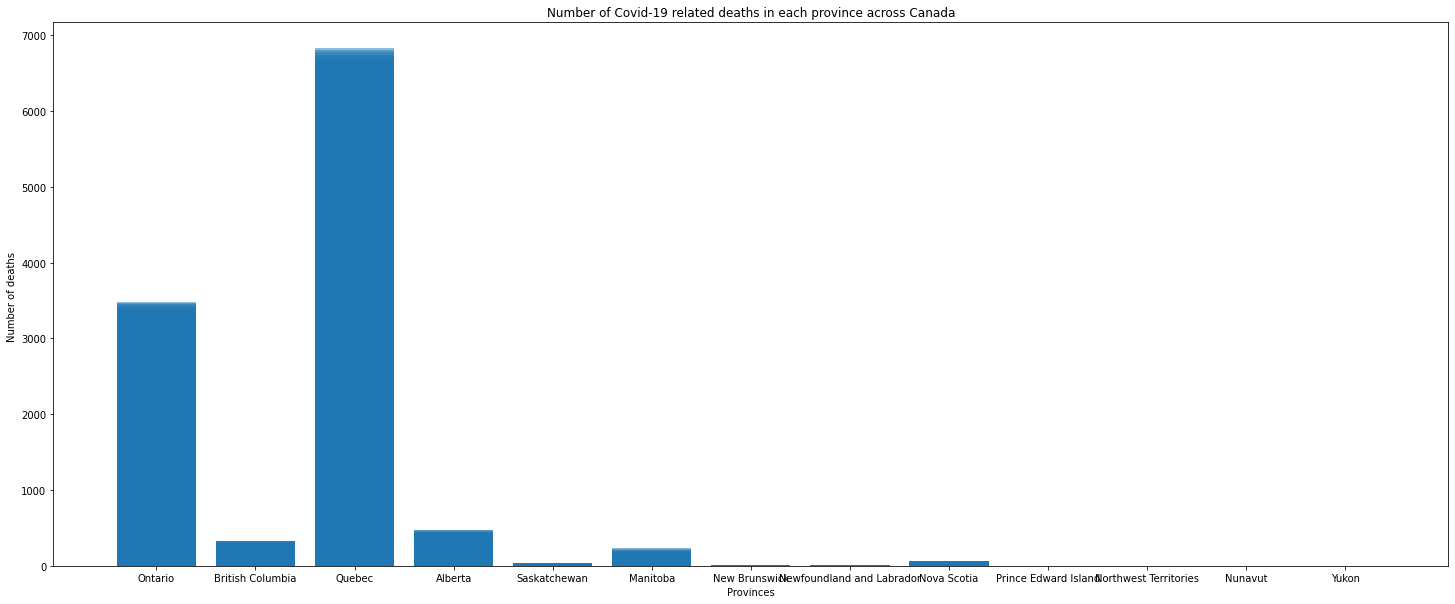

In [ ]:
#Comparison of the number of active cases across the different provinces in canada
plt.figure(figsize = (25,10))
plt.bar(df_covid2.prname, df_covid2.numdeaths, align='center',  alpha=0.5)
plt.xlabel('Provinces')
plt.ylabel('Number of deaths ')
plt.title('Number of Covid-19 related deaths in each province across Canada')
plt.show()

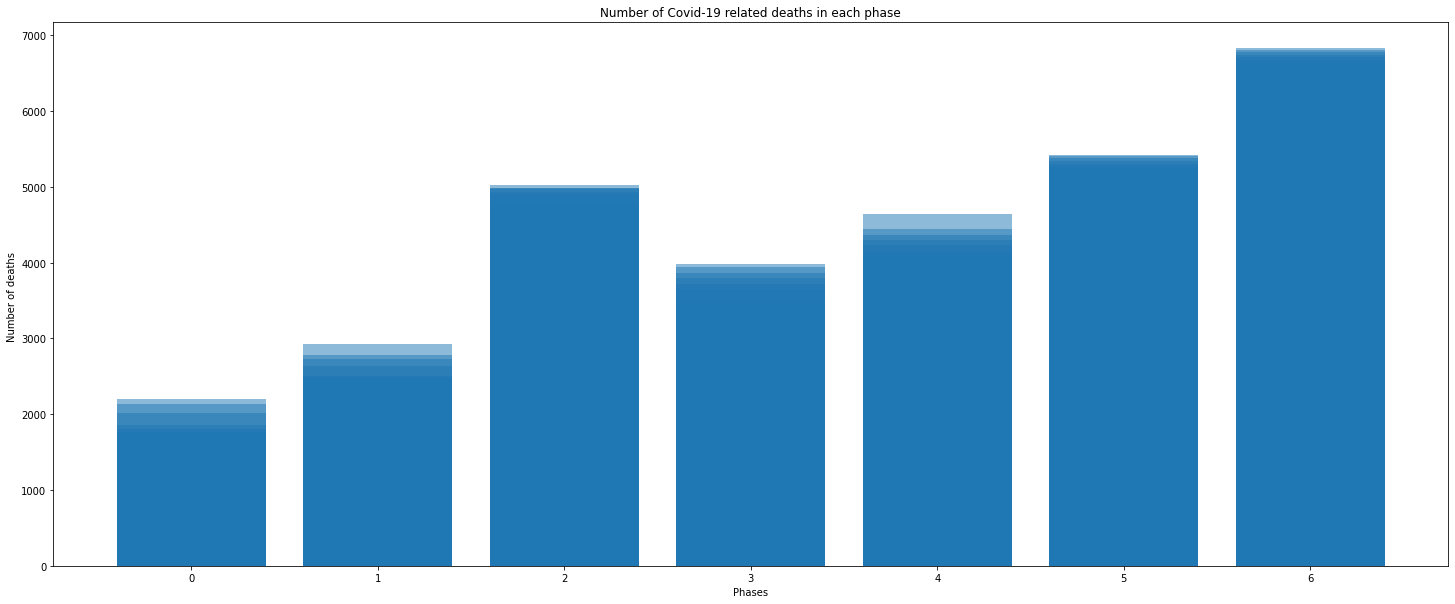

In [ ]:
plt.figure(figsize = (25,10))
plt.bar(df_covid2.phases, df_covid2.numdeaths, align='center',  alpha=0.5)
plt.xlabel('Phases')
plt.ylabel('Number of deaths ')
plt.title('Number of Covid-19 related deaths in each phase')
#increase font size 
plt.rcParams.update({'font.size':20})
plt.show()

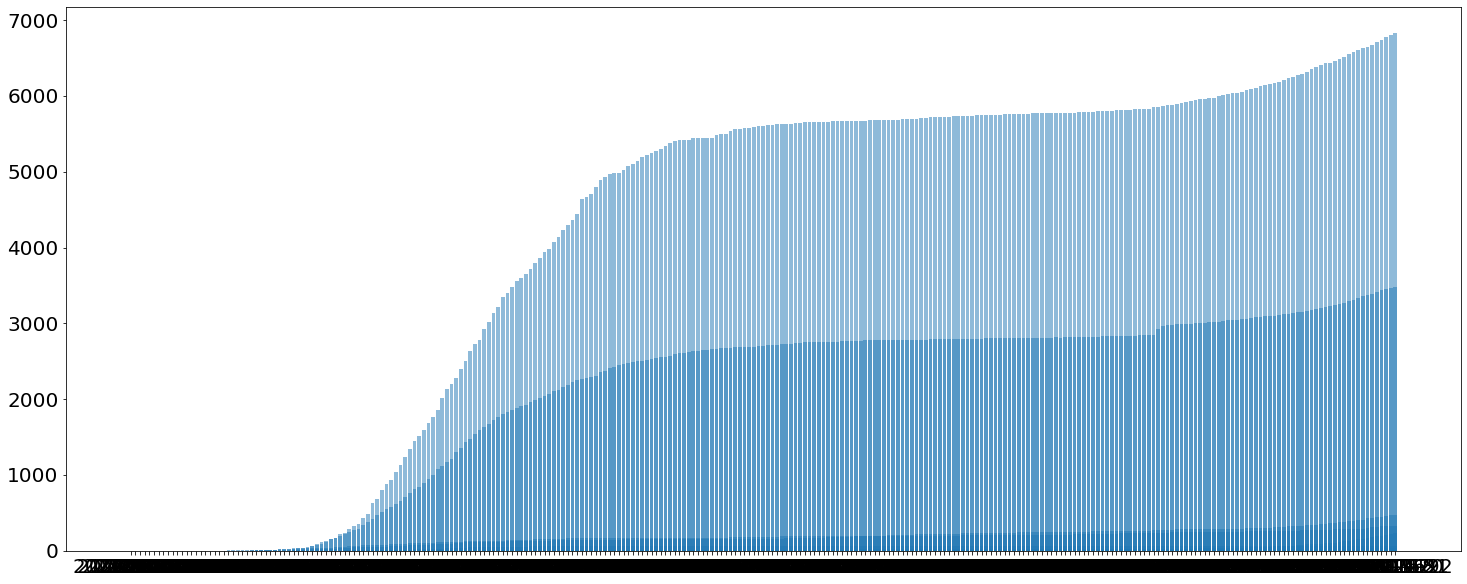

In [ ]:
plt.figure(figsize = (25,10))
plt.bar(df_covid2.date, df_covid2.numdeaths, align='center',  alpha=0.5)

plt.show()

# Data Mining Algorithms

In [ ]:
#independent variables
x_numerical = df_covid2[['numactive', 'numtested', 'percentdeath', 'numrecover','phases','pruid']]

In [ ]:
x_numerical.shape

(3382, 6)

In [ ]:
#dependent variable
y = df_covid2['numdeaths'] 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#split the dataset into train and test part 
x_train, x_test, y_train, y_test = train_test_split(x_numerical, y, test_size = .25)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_regression = LinearRegression()
lin_fit = lin_regression.fit(x_train, y_train)

y_pred_linear = lin_regression.predict(x_test)

linear_accuracy = lin_regression.score(x_numerical,y)
print(100*linear_accuracy,'%')

92.637037765626 %


In [ ]:
#cross validation for linear regression algorithm
from sklearn.model_selection import cross_val_score
clf1 = LinearRegression()
score1 = cross_val_score (lin_fit, x_numerical, y, cv=5)
score1

array([-0.7427948 ,  0.90119613,  0.91573947,  0.90277038,  0.46822331])

In [ ]:
score1.mean()

0.4890268994718445

In [ ]:
# Naive Bayes (Bayesian ridge)
from sklearn.linear_model import BayesianRidge

n_bayes = BayesianRidge()
n_bayes.fit(x_train, y_train)

y_pred_naive_bayes = n_bayes.predict(x_test)

nb_accuracy = n_bayes.score(x_numerical,y)
print(100*nb_accuracy,'%')

92.63544692757682 %


In [ ]:
# cross validation for Naive Bayes (Bayesian ridge) algorithm 
clf2 = n_bayes
score2 = cross_val_score (clf2, x_numerical, y, cv=5)
score2

array([-0.72892278,  0.90180246,  0.9157255 ,  0.90254919,  0.46841576])

In [ ]:
score2.mean()

0.49191402756533054

In [ ]:
#Random forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor(max_depth=2, random_state=0)
rand_forest.fit(x_train, y_train)

y_pred_rand_forest = rand_forest.predict(x_test)

rand_forest_accuracy = rand_forest.score(x_numerical,y)
print(100*rand_forest_accuracy,'%')

95.90474684571252 %


In [ ]:
#cross validation for random forest Regressor algorithm
clf6 = rand_forest
score6 = cross_val_score (clf6, x_numerical, y, cv=5)
score6

array([0.25008585, 0.32848481, 0.93473005, 0.98730041, 0.68928272])

In [ ]:
#Decision trees Regressor
from sklearn import tree
dtrees = tree.DecisionTreeRegressor()
dtrees.fit(x_train, y_train)
y_pred_dtress = dtrees.predict(x_test)

dtrees_accuracy = dtrees.score(x_numerical,y)
print(100*dtrees_accuracy,'%')

99.99511949961003 %


In [ ]:
#cross validation for DecisionTreeRegressor algorithm
clf4 = dtrees
score4 = cross_val_score (clf4, x_numerical, y, cv=5)
score4

array([0.25960559, 0.62055168, 0.79565985, 0.9998295 , 0.53077629])

In [ ]:
score4.mean()

0.641284580357967

In [ ]:
#Neural network MLP regressor 
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
 
regr = MLPRegressor(random_state=1, max_iter=10000).fit(x_train, y_train)
regr.predict(x_test)

regr.score(x_test, y_test)

regr_accuracy = regr.score(x_numerical,y)
print(100*regr_accuracy,'%')

90.14852661970092 %


In [ ]:
#cross validation for Neural network MLP regressor
clf5 = regr
score5 = cross_val_score (clf5, x_numerical, y, cv=5)
score5

array([ 0.4493126 ,  0.89244728,  0.85641641,  0.79711297, -0.214443  ])

In [ ]:
score5.mean()

0.5561692533931101

In [ ]:
# voting Regressor 1
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor(estimators=[('gb', dtrees), ('rf', rand_forest), ('lr', n_bayes)])
vot_reg.fit(x_train, y_train)
y_pred_vot_reg = vot_reg.predict(x_test)

vot_reg_accuracy = vot_reg.score(x_numerical,y)
print(100*vot_reg_accuracy,'%')

98.69813915198839 %


In [ ]:
#cross Validation score for Voting regressor which includes decison tree, random forrest and naive bayes 
clf7 = vot_reg
score7 = cross_val_score (clf7, x_numerical, y, cv=5)
score7

array([0.87800542, 0.71908111, 0.91263199, 0.98428955, 0.915263  ])

In [ ]:
score7.mean()

0.8818542117968289

In [ ]:
# voting Regressor 2
from sklearn.ensemble import VotingRegressor
vot_reg1 = VotingRegressor(estimators=[('gb', dtrees), ('rf', rand_forest),('vv',regr)])
vot_reg1.fit(x_train, y_train)
y_pred_vot_reg1 = vot_reg1.predict(x_test)

vot_reg_accuracy1 = vot_reg1.score(x_numerical,y)
print(100*vot_reg_accuracy1,'%')

98.39688644931341 %


In [ ]:
#cross Validation score for Voting regressor which includes decison tree, random forrest and Neural network MLP regressor
clf8 = vot_reg1
score8 = cross_val_score (clf8, x_numerical, y, cv=5)
score8.mean()

0.8525359715566185

# Model Evaluation

In [ ]:
#Linear Regression 
import sklearn.metrics as sm
print("Linear Regression model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_linear), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_linear), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_linear, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_linear), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_linear), 2))
print("R2 score =", round(sm.r2_score(y_test,y_pred_linear), 2))

Linear Regression model performance:
Mean absolute error(MAE) = 257.09
Mean squared error(MSE) = 155614.01
Root mean squared error(MSE) = 155614.01
Median absolute error = 194.3
Explain variance score = 0.92
R2 score = 0.92


In [ ]:
#Naive Bayes(Bayesian Ridge)
print("Naive Bayes (Bayesian Ridge) model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_naive_bayes), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_naive_bayes), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_naive_bayes, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_naive_bayes), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_naive_bayes), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred_naive_bayes), 2))

Naive Bayes (Bayesian Ridge) model performance:
Mean absolute error(MAE) = 256.51
Mean squared error(MSE) = 155734.63
Root mean squared error(MSE) = 155734.63
Median absolute error = 193.3
Explain variance score = 0.92
R2 score = 0.92


In [ ]:
#Decision trees regressor model
print("Decision trees regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_dtress), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_dtress), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_dtress, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dtress), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_dtress), 2))
print("R2 score =", round(sm.r2_score(y_test,y_pred_dtress), 2))

Decision trees regressor model performance:
Mean absolute error(MAE) = 4.24
Mean squared error(MSE) = 395.76
Root mean squared error(MSE) = 395.76
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [ ]:
#Neural network MLP regressor
print("Neural network MLP regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, regr.predict(x_test)), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, regr.predict(x_test)), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, regr.predict(x_test), squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, regr.predict(x_test)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,regr.predict(x_test)), 2))
print("R2 score =", round(sm.r2_score(y_test,regr.predict(x_test)), 2))

Neural network MLP regressor model performance:
Mean absolute error(MAE) = 189.48
Mean squared error(MSE) = 212885.75
Root mean squared error(MSE) = 212885.75
Median absolute error = 11.02
Explain variance score = 0.9
R2 score = 0.9


In [ ]:
#Random forest  
print("Random forest performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_rand_forest), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_rand_forest), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_rand_forest, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rand_forest), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_rand_forest), 2))
print("R2 score =", round(sm.r2_score(y_test,y_pred_rand_forest), 2))

Random forest performance:
Mean absolute error(MAE) = 131.1
Mean squared error(MSE) = 111743.0
Root mean squared error(MSE) = 111743.0
Median absolute error = 49.62
Explain variance score = 0.95
R2 score = 0.95


In [ ]:
#VotingRegressor  1
print("Random forest performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_vot_reg), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_vot_reg), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_vot_reg, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_vot_reg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_vot_reg), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred_vot_reg), 2))

Random forest performance:
Mean absolute error(MAE) = 86.96
Mean squared error(MSE) = 34035.07
Root mean squared error(MSE) = 34035.07
Median absolute error = 47.74
Explain variance score = 0.98
R2 score = 0.98


In [ ]:
#VotingRegressor 2
print("Random forest performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_vot_reg1), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_vot_reg1), 2))
print("Root mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred_vot_reg1, squared=True), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_vot_reg1), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,y_pred_vot_reg1), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred_vot_reg1), 2))

Random forest performance:
Mean absolute error(MAE) = 81.41
Mean squared error(MSE) = 42783.2
Root mean squared error(MSE) = 42783.2
Median absolute error = 16.38
Explain variance score = 0.98
R2 score = 0.98


# Graphical Representation of Model Accuracy

In [ ]:
results = [linear_accuracy*100,nb_accuracy*100,rand_forest_accuracy*100,dtrees_accuracy*100,regr_accuracy*100,vot_reg_accuracy*100]

In [ ]:
names= ['LI','NB','RF','DT','NN','VR']

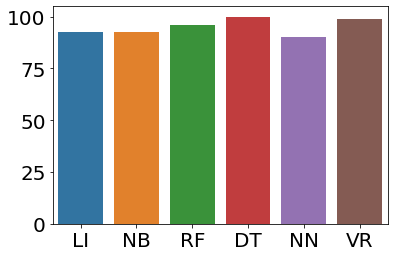

In [ ]:
sns.barplot(x= names, y=results)